## Exercise 3 : Linear Regression (deadline 12.03.2024)


## Note: please complete the tasks in this file, and rename the file as "Exercise_03_FirstName_LastName.ipynb"


In this exercise session we will see how to perform one- and multidimensional regression tasks on a given dataset.
We will learn to use the python libraries **scipy.stats** as well as **statsmodels** to find regression parameters and their statistics. More information on the given libraries can be found in the following websites:

https://docs.scipy.org/doc/scipy/reference/stats.html

https://www.statsmodels.org/stable/index.html


Depending on the environment you are using, **statsmodels** can be installed (via terminal) by typing
- __*pip3 install statsmodels*__

In [19]:
# Load all dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

First, we have to generate some sample data x and y to explore **stats.linregress** functionalities. It facilitates calculating a linear least-squares regression for two sets of measurements. **x** here is an evenly spaced values between 0 and 200, whereas **y** is a function of x and its intercept is normally distributed random numbers with the same size as x.

In [20]:
# set up some sample data
x = np.arange(200)
y = 2.5 * x + np.random.normal(0, 10, x.shape)

# linear regression fit
s, inter, r_value, p_value, std_err = stats.linregress(x, y)

print('slope:\t', round(s, 3))
print('inter:\t', round(inter, 3))
print('r2 val:\t', round(r_value**2, 3))
print('p  val:\t', p_value)
print('std:\t', round(std_err, 3))

slope:	 2.511
inter:	 -2.024
r2 val:	 0.995
p  val:	 3.1679594018301105e-233
std:	 0.012


The return value of **stats.linregress** acts like a namedtuple of length 5, with fields slope, intercept, rvalue, pvalue and stderr. Furthermore, we create scatter plot of x vs. y overlaid with extracted fitting line, and residuals plot (difference between fitted plot and original data),

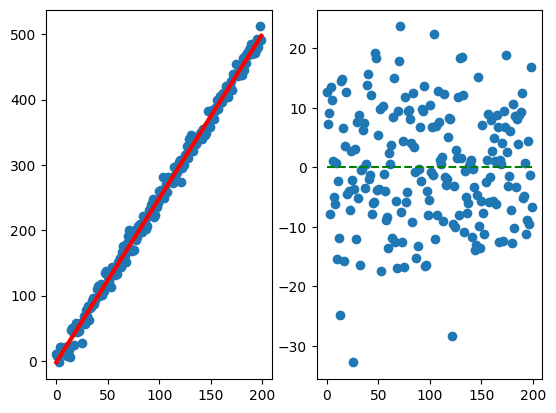

In [21]:
# plotting and comparison
line = s * x + inter
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, y-line)
ax1.plot(x, np.zeros_like(x), 'g--')

Now we do the same operations but with **statsmodels** package. This will be done by creating a dataframe including x and y using **pandas**. Detailed output from **statsmodels.formula.api.ols** can be printed in the form of summary.

In [22]:
import pandas as pd
import statsmodels.formula.api as sm

In [23]:
# set up some sample data
x = np.arange(200)
y = 2.5 * x + np.random.normal(0, 10, x.shape)
df = pd.DataFrame({'x': x, 'y': y})
# linear regression fit
reg = sm.ols(formula='y ~ x', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.712e+04
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          3.17e-227
Time:                        14:52:51   Log-Likelihood:                -755.73
No. Observations:                 200   AIC:                             1515.
Df Residuals:                     198   BIC:                             1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6676      1.499     -1.779      0.0

slope:	 2.511132724029319
inter:	 -2.6676066859646834
r2 val:	 0.9946946188325719


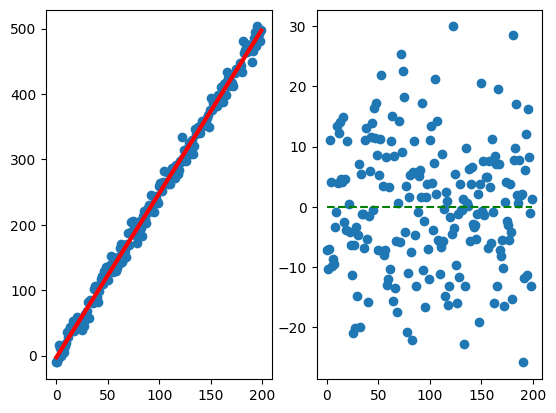

In [24]:
# read out the fitting parameters
inter, s = reg.params
line = s * x + inter
print('slope:\t', s)
print('inter:\t', inter)
print('r2 val:\t', reg.rsquared)

# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, y-line)
ax1.plot(x, np.zeros_like(x), 'g--')

### Exercise 1 (total 3 points + 1 point bonus) : Fitting proportional samples

The above algorithms fit the underlying data columns by means of the least-square method. Show that if you fit two proportional samples, the slopes of the two fits has the same proportionality constant of the samples. Justify by showing the values of s and plotting. 

**Exercise 1.1 (1 point)** Define the data x, y, z: x are numbers from 0 to 200, y is the same as 1.5 * x - 2 plus a normal noise of modulus 10, z is 3 * y. 

**Exercise 1.2 (1 point)**: Perform linear regression on your sample data by  fitting both y ~ x and z ~ x. Print respective slope,intercept and  fitting equations.

**Exercise 1.3 (1 points)**: Visualize your data overlaid with fitted lines( both y ~ x and z ~ x on the same plot) and their residual plots (again on the same plot). Plot the lengend.

**Exercise 1.4 (1 point bouns):** What can you tell me about the value of the standard deviation of the 2 fits?  

### Data transformations
Nature likes power laws...

Often columns in the provided data are in fact correlated but the linear fitting requires to transform one or even both columns, e.g. through the **log-transformation**.

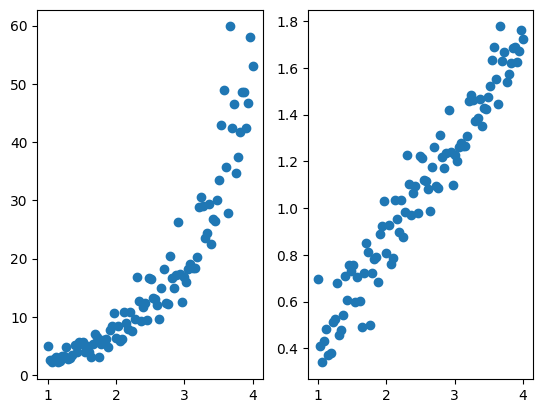

In [25]:
# an example case
x = np.linspace(1, 4, 100)
y = np.exp(x + np.random.normal(0, .2, x.shape))

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax1.scatter(x, np.log10(y))

### Exercise 2 ( total 4 points): Combining transformations and linear regression

**Exercise 2.1 (1 point)**:Load the **bird_data_vincze_etal_2015.csv** dataset from the data folder as a pandas dataframe and examine the columns.

**Exercise 2.2 (1 points)**: Plot the column pairs such as  **Brain mass** vs. **Wing area** and display visually. The perform a log10 tranformation on both the column and fit them. Display visually the result.

**Exercise 2.3 (2 point)**:Show that if we invert the fit the result is different ( **Wing area** vs. **Brain mass**) by printing the **s** e **inter** values for both the fit and plotting the two fit on the same figure.

## Multiple linear regression
Let's now apply the same concepts to regress the best hyper-plane given three data columns.
The following example performs a 2-dimensional regression (using least-squares method) to fit
$z=a_{0} + a_{1}x + a_{2}y$

In [31]:
# set up some sample data
x = np.random.uniform(-5, 5, 100)
y = np.random.uniform(-5, 5, 100)
z = 0.5*x + 0.4*y + np.random.normal(0, 0.25, x.shape)
# collect them in a pandas dataframe
df = pd.DataFrame({'x': x,
                   'y': y,
                   'z': z})

# linear regression fit
reg = sm.ols(formula='z ~ x + y', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2896.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.23e-87
Time:                        14:53:46   Log-Likelihood:                -2.7418
No. Observations:                 100   AIC:                             11.48
Df Residuals:                      97   BIC:                             19.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0110      0.026     -0.429      0.6

Since we are dealing with 3D data, we need to import additionally **Axes3D** from **mpl_toolkits.mplot3d**. This allows us to create 3D plots.

The fitting formula is: z = -0.011 + 0.503 x + 0.385 y


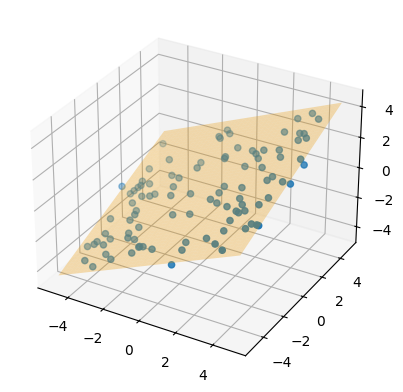

In [32]:
from mpl_toolkits.mplot3d import Axes3D
a0, a1, a2 = reg.params
print('The fitting formula is: z = {0:} + {1:} x + {2:} y'.format(round(a0, 3),round(a1, 3), round(a2, 3)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# set up the surface plot
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(X, Y)
ZZ = a0 + a1 * XX + a2 * YY
ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='orange')
plt.show()

### Exercise 3 (total 3 points): Multiple linear regression

**Exercise 3.1 (1 point)**: Load the _data\_multiregr.csv_ from the data folder and examine the dataset. 

**Exercise 3.2 (1 point)**: Make a scatter plot of __(x,y,z)__ after applying exp-transform to z values.

**Exercise 3.3 (1 points)**: Applying the techniques from above, fit the three datacolumns using multidimensional linear regression. Provide the scatter plot with fitted plane.